 # The Sparks Foundation

# GRIP (Graduate Rotational Internship Program) February-2023

# Name: VORA GAUTAM KALYANBHAI

# Domain: Data Science & Business Analytics

# Task 2 - Prediction using Unsupervised Machine Learning

# Problem Statement :

# From the given 'Iris' Dataset Predict Optimum Number of clusters and represent it visually.

In [2]:
# Importing all libraries required in this notebook
from pandas import * 
from numpy import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import kstest

from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Reading The Dataset

In [3]:
Iris =read_csv("C:\\Users\\A\\Spark Foundation\\Iris.csv")
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring Data :

In [4]:
Iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [46]:
Iris.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [47]:
Iris.shape

(150, 6)

# Conclusion :
 Here We have 150 Rows / Records (Including Label) and 6 Columns / Attributes.

# Now we check for Null value if it's present

In [48]:
Iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Conclusion :
Here there is no Null value present in data.

# Descriptive Statistics :

In [50]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


The Average SepalLengthCm is 5.843333

The Avetage SepalWidthCm is 3.054000

The Avetage PetalLengthCm is 3.758667

The Avetage PetalWidthCm is 1.198667

# We dont need index column because its just a index column hence we drop it

In [51]:
Iris.drop(labels='Id', axis=1, inplace=True)
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Correlation Between Sepal Length(cm),Sepal Width(cm),Petal Length(cm) & Petal Width(cm) :

In [52]:
Iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

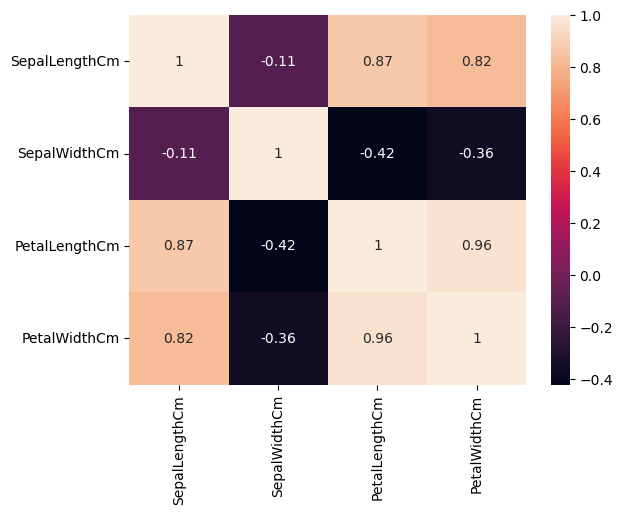

In [53]:
#Plotting Heatmap for better understanding of above numerical data
sns.heatmap(Iris.corr(),annot=True)

# Conclusion :
Thus,

from the Heatmap, We can observe that Petal Length(cm) is Higly possitively correlated with Sepal Length(cm) and more negatively correlated with Sepal Width(cm)

also Petal Width(cm) is possitively correlated with Sepal Length(cm) and less negatively correlated with Sepal Width(cm)

# Now we Plot Pairplot to get better understanding of Categorical Attribute "Spiecies"

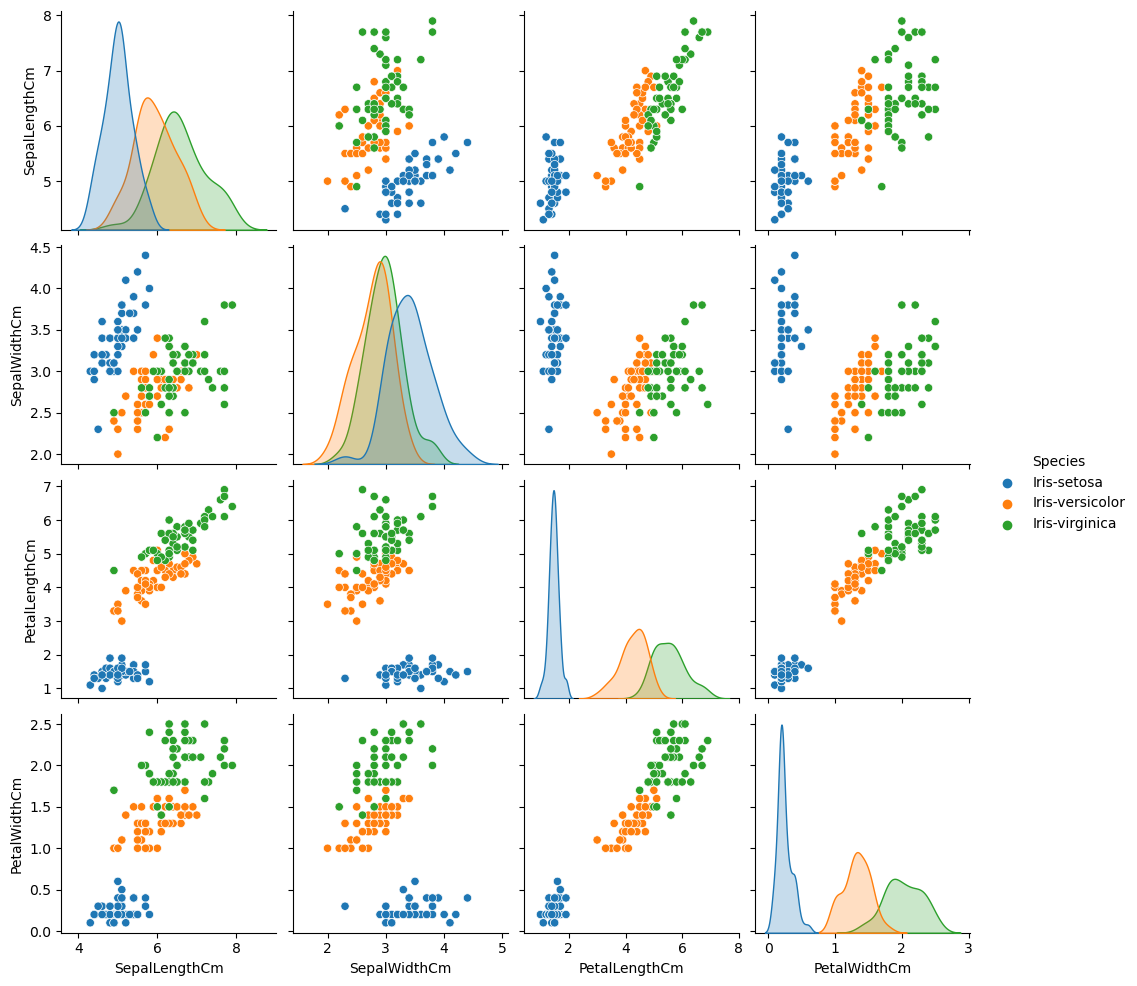

In [54]:
sns.pairplot(Iris,hue='Species')
plt.show()

# Conclusion :
Here, We have Three(3) types of Spiecies

1.Iris-Setosa

2.Iris-versicolor

3.Iris-virginica

# Plotting Scatter plot of Speices with Petal Length (Cm) and PetalWidth (Cm)

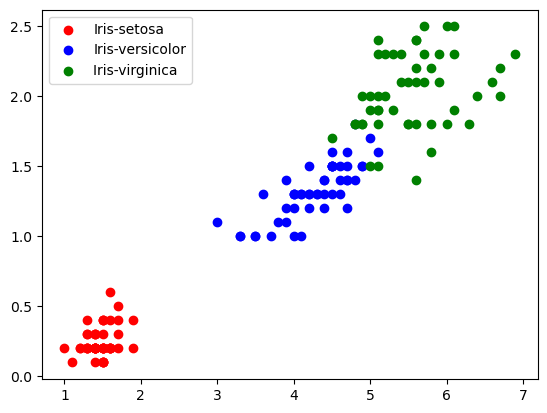

In [55]:
df1 = Iris[Iris['Species']=='Iris-setosa']
df2 = Iris[Iris['Species']=='Iris-versicolor']
df3 = Iris[Iris['Species']=='Iris-virginica']

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color='r' , label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color='b', label='Iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color='g' , label='Iris-virginica ')


plt.legend()
plt.show()


# Finding the optimum number of clusters
We Use popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm.

The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster.

In [56]:
Iris_imp = Iris.iloc[:,0:4]
from sklearn.cluster import KMeans
k_meansclus = range(1,10)
sum_of_square = []

for k in k_meansclus :
  km = KMeans(n_clusters =k)
  km.fit(Iris_imp)
  sum_of_square.append(km.inertia_)
sum_of_square

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.535582051282056,
 38.95701115711986,
 34.335290893888725,
 30.194786064530987,
 27.963035714285713]

# Now we plot k_meansclus on X axis and sum_of_square on Y axis

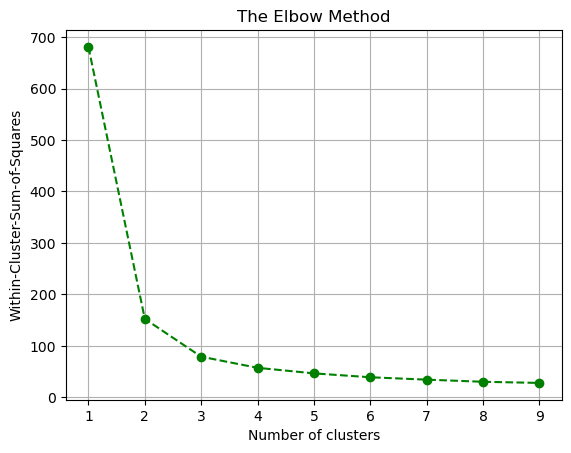

In [57]:
plt.title('The Elbow Method')
plt.plot(k_meansclus,sum_of_square, 'go--')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares') 
plt.grid()
plt.show()

# Conclusion :
Here, From the Elbow method we can observe that '3' is the optimum point for us, because after which we do not see sharp change in graph.

So here the optimum number of clusters are three(3)

In [58]:
km1 = KMeans(n_clusters=3,max_iter=300 , random_state=0)
km1.fit(Iris_imp)

KMeans(n_clusters=3, random_state=0)

 In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [59]:
y_means = km1.fit_predict(Iris_imp)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Conclusion :
Here, the above code distribute rows in three cluster named 0,1 and 2

In [60]:
Iris_imp = array(Iris_imp)
Iris_imp

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Finely, we visualize clusters that we had formed

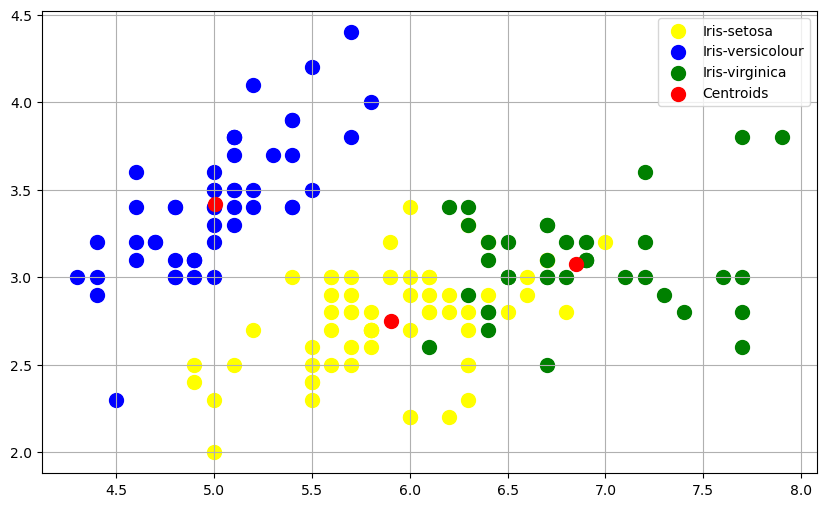

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(Iris_imp[y_means == 0, 0], Iris_imp[y_means == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')

plt.scatter(Iris_imp[y_means == 1, 0], Iris_imp[y_means == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(Iris_imp[y_means == 2, 0], Iris_imp[y_means == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.grid()
plt.show()

# Ploting 3D Scatter plot of clusters

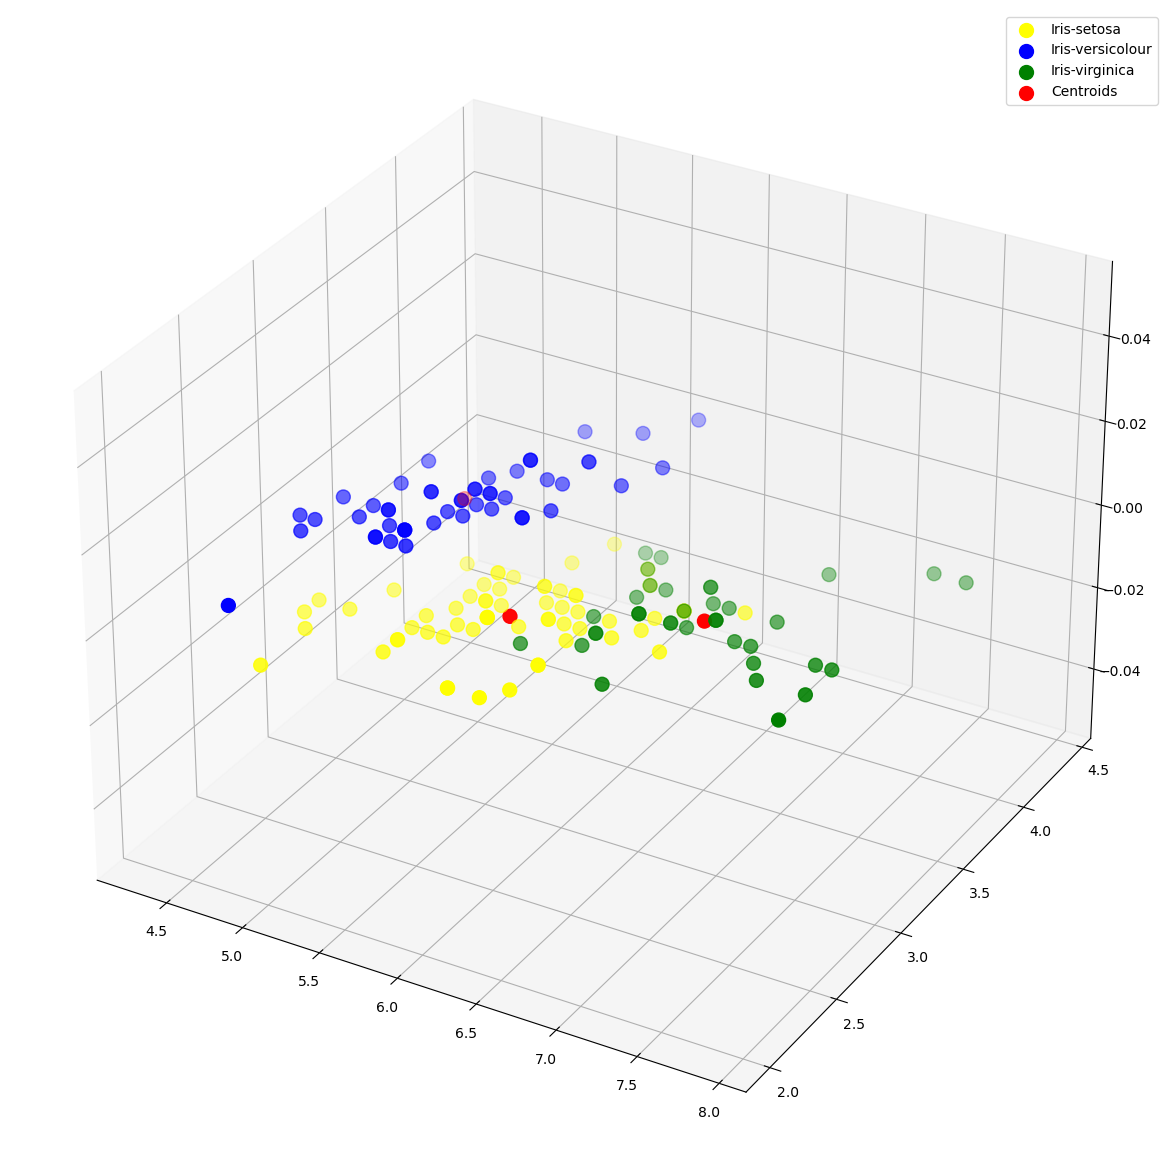

In [62]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
plt.scatter(Iris_imp[y_means == 0, 0], Iris_imp[y_means == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')

plt.scatter(Iris_imp[y_means == 1, 0], Iris_imp[y_means == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(Iris_imp[y_means == 2, 0], Iris_imp[y_means == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:,1], 
            s = 100, c = 'Red', label = 'Centroids')

plt.legend()
plt.show()

# Conclusion :
# From this we may conclude that optimum number of clusters should be 'three(3)'
# Thank You